Make sure you run the trials in *fpme.ipynb* for $2 \leq ng \leq 5$ and $2 \leq nc \leq 5 $.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
import os

from trials import NUM_TRIALS, load_fpme_trial_summary

In [2]:
os.makedirs('plots', exist_ok=True)
os.makedirs('plots/fpme', exist_ok=True)

In [3]:
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally
plt.rc('font', size=15)

In [4]:
data_dict = dict()

for g in range(2, 6): # groups
    data_dict[g] = dict()
    for c in range(2, 6): # classes        
        y1 = np.zeros(4) # a errors
        y2 = np.zeros(4) # B errors
        y3 = np.zeros(4) # lambda errors
        data_dict[g][c] = [y1, y2, y3]

In [5]:
# group to color / linestyle

colors = {
    2: 'r',
    3: 'g',
    4: 'b',
    5: 'm',
}

linestyles= {
    2: 'solid',
    3: 'dashed',
    4: 'dotted',
    5: 'dashdot',
}

In [6]:
for g in range(2, 6):
    for c in range(2, 6):
        a_err = None
        B_err = None
        lamb_err = None
        try:
            a_err, B_err, lamb_err = load_fpme_trial_summary(g, c)
        except:
            print(f"missing class {c}")
            continue
            
        assert len(a_err) == NUM_TRIALS
        assert a_err.shape == B_err.shape == lamb_err.shape
        data_dict[g][c][0] = a_err
        data_dict[g][c][1] = B_err
        data_dict[g][c][2] = lamb_err

In [7]:
def plot_groups_together(idx, ylabel, title, show_std, savepath):
    '''
    idx: 0 for a, 1 for B
    '''
    plt.figure(figsize=(8,5))

    x = [2, 3, 4, 5]
    xticks = [2, 6, 12, 20]
    for g in range(2, 6):
        avg_errs = []
        std_errs = []
        for c in x:
            err = data_dict[g][c][idx]
                        
            err_std = 0
            if show_std:
                err_std = np.std(err)
            err_avg = np.median(err)
            
            avg_errs.append(err_avg)
            std_errs.append(err_std)

        plt.errorbar(xticks, avg_errs, yerr=std_errs,
                     elinewidth=1,
                     capsize=2,
                     linewidth=3,
                     fmt='-.o',
                     color=colors[g],
                     linestyle=linestyles[g],
                     label=f"m={g}"
                    )
    
    plt.legend(loc = 'upper left', prop={'size': 18})

    plt.xlabel('$\mathbf{q = (k^2 - k)}$, k = # classes', fontsize = 24, weight = 'bold')
    plt.xticks(xticks, fontsize=20)
    plt.yticks(fontsize=20)

    plt.ylabel(ylabel,  fontsize = 24, weight = 'bold')
    plt.title(title, fontsize = 24, weight = 'bold')
    
    if idx != 1:
        plt.ticklabel_format(style='sci', axis='y', scilimits=(-3,-3))
    print(f'saving to {savepath}')
    
    plt.tight_layout()
    plt.savefig(savepath, format = "png", bbox_inches = "tight")
    plt.show()
    
         

def plot_a(group = None):
    ylabel = r'$\mathbf{\Vert a - \hat a \Vert_2}$'
    if group is None:
        title = 'a Elicitation Error - FairME'
        plot_groups_together(0, ylabel, title, False, './plots/fpme/fpme_a.png')
    else:
        title = f'Elicitation Error in a for m={group} - Fair ME'
        plot_group(0, group, ylabel, title, False, f'./plots/fpme/fpme_a_1e-2_group{group}.png')
    
def plot_b(group = None):
    ylabel = r'$\mathbf{\sum_{u,v} \Vert B^{uv} - \hat B^{uv} \Vert_F}$'
    if group is None:
        title = 'B Elicitation Error - FairME'
        plot_groups_together(1, ylabel, title, False, './plots/fpme/fpme_B.png')
    else:
        title = f'Elicitation Error in B for m={group} - Fair ME'
        plot_group(1, group, ylabel, title, False, f'./plots/fpme/fpme_B_1e-2_group{group}.png')
    
    
def plot_lamb(group = None):
    ylabel = r'$\mathbf{ | \lambda - \hat \lambda |}$'
    if group is None:
        title = '$\lambda$ Elicitation Error - FairME'
        plot_groups_together(2, ylabel, title, False, './plots/fpme/fpme_lamb.png')
    else:
        title = 'Elicitation Error in $\lambda$ - Fair ME'
        plot_group(2, group, ylabel, title, False, f'./plots/fpme/fpme_lamb_1e-2_group{group}.png')

saving to ./plots/fpme/fpme_a.png


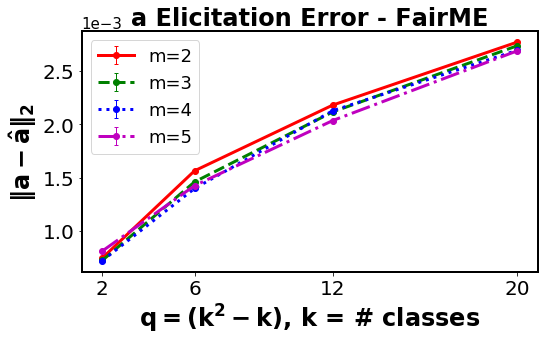

In [8]:
plot_a()

saving to ./plots/fpme/fpme_B.png


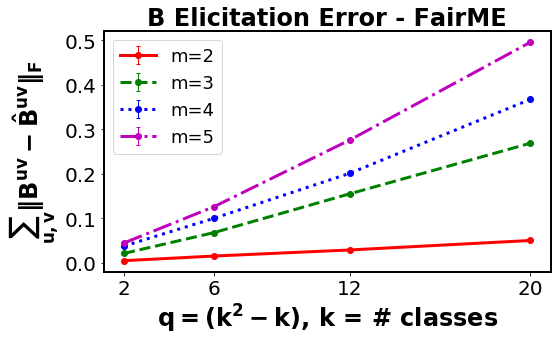

In [9]:
plot_b()

saving to ./plots/fpme/fpme_lamb.png


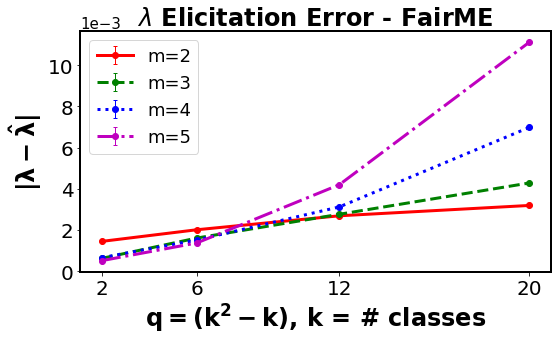

In [10]:
plot_lamb()